provided a DATASET of ~1.7M records of posts collected from Reddit using Google big query.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
data=pd.read_csv("MBTI 500.csv")
raw_data=pd.read_csv("mbti_full_pull.csv")

In [8]:
raw_data

,author_flair_text,body,subreddit
0,INTJ,Knowing you're in INTJ is a tool for you to us...,intj
1,INTJ,You are truly an enlightened mastermind.,intj
2,"INFJ, 26F",You should :) it will help if you have a down ...,infj
3,INTP,I watch a bit of everything (including hentai)...,INTP
4,INTJ,I don't know if I would count this as a pet pe...,intj
...,...,...,...
1794011,INTP,Remind me! 40 hours,INTP
1794012,INTJ,We are seeing the start of a process that is g...,intj
1794013,INTJ,[NSFDL. I cry laughing at this every single ti...,intj
1794014,INFJ,Ravenclaw!,infj


In [9]:
# raw_data['subreddit'].apply(lambda x:x.upper()).value_counts()

In [10]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [11]:
data['posts'][100000]

'would want farmer fe like force also want feel like dishonor legacy ancestor farmer time maybe best thing legacy remain farmer eternity maybe something good world buuut maybe maybe right first time idea make sense always contradict another thing people tell tell absolutely awful relationship department one ask advice see reason doubt entj iw ant tell im go feel like ill get dismiss want around problem severe depression moderate anxiety wan push away hurt put charade time shit weigh tell struggle think vague really engage dismissive like take seriously maybe struggle none u talk feel feel alone even surround people love hurt sometimes feel like im pussy reason feel way shitty hate want feel normal fuck hard hard year life far im fine financially sersiouly know wtf im suppose life deal self loathe anxious depress bullshit make exhaust hard think straight guess know big problem able talk feel even pen paper txt yes long time time stress talk whoever goofy self work sometimes whenever act

<AxesSubplot:>

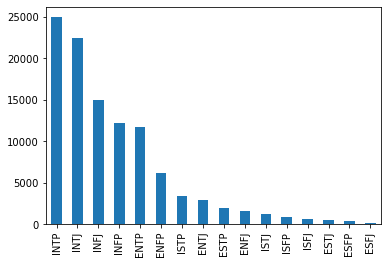

In [12]:
data['type'].value_counts().plot(kind='bar')

In [13]:
data['type'].value_counts() # INTP 24961, ESFJ 181 

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [15]:
data['energy']=data['type'].apply(lambda x:x[0])
data['recognize']=data['type'].apply(lambda x:x[1])
data['judgment']=data['type'].apply(lambda x:x[2])
data['plan']=data['type'].apply(lambda x:x[3])

In [16]:
data

,posts,type,energy,recognize,judgment,plan
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P
106064,schedule modify hey w intp strong wing underst...,INFP,I,N,F,P
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P


In [17]:
data['energy'].value_counts() # I : 80677, E : 25390
data['recognize'].value_counts() # N : 96866, S : 9201
data['judgment'].value_counts() # T : 69203, F : 36864
data['plan'].value_counts() # P : 61632, J : 44435

# N or S 의 데이터가 10 대1로 비대칭임
# 그다음순으로 I or E가 3대1로 비대칭

P    61632
J    44435
Name: plan, dtype: int64

In [18]:
data['posts length']=data['posts'].apply(lambda x:len(x))

<AxesSubplot:xlabel='posts length', ylabel='Count'>

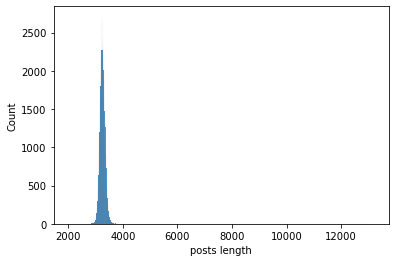

In [19]:
sns.histplot(data['posts length'])

In [20]:
data['voca count']=data['posts'].apply(lambda x:x.split()).apply(lambda x:len(x))

<AxesSubplot:xlabel='voca count', ylabel='Count'>

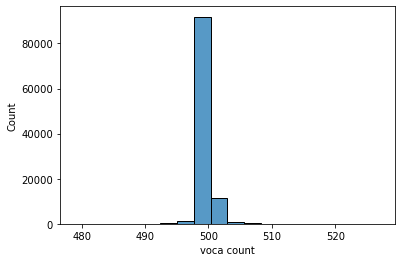

In [21]:
sns.histplot(data['voca count'])

In [22]:
data['voca count'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: voca count, dtype: float64

In [23]:
# EDA 진행 

In [24]:
# ----------------------------------------------------- # 

In [25]:
# 분류, 토큰, 형태소 분석, 태깅, 구문 분석

In [26]:
# https://lemontia.tistory.com/802

In [27]:
import nltk

from nltk.corpus import stopwords

stopwords.words('english')[:10]
# ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
# stopwords.words('english')


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
# https://ngio.co.kr/9518

In [29]:
# 텍스트 마이닝
# https://m.blog.naver.com/rufgksdb/221592552859

In [ ]:
# 토큰화 (의미는 단어로 나뉘어 준비)

In [ ]:
# 자연어 처리 패키지 참고
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html
https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [30]:
sample_text=data['posts'][0]

In [39]:
# 토큰 생성
from nltk.tokenize import sent_tokenize # 문장을 리스트 안에 집어넣음

In [40]:
# print(sent_tokenize(sample_text))

In [41]:
# sent_tokenize(sample_text) # 단순히 리스트 안에 집어넣은것 밖에 안되는듯?

In [42]:
from nltk.tokenize import word_tokenize

In [44]:
# word_tokenize(sample_text) # 공백단위 토크나이즈한듯?

In [45]:
from nltk.tokenize import RegexpTokenizer

In [46]:
retokenize = RegexpTokenizer("[\w]+")
# retokenize.tokenize(sample_text)

In [47]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [48]:
st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [49]:
# 

In [50]:
from nltk.stem import WordNetLemmatizer
words = ["flies", "fly", "flying", "flew", "flown"]

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [51]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [52]:
# 단어 토큰에 품사를 부착하여 튜플로 출력

In [53]:
from nltk.tag import pos_tag

In [54]:
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [56]:
from nltk import Text

In [57]:
# 각 단어 사용 빈도 그래프 출력

In [58]:
text = Text(retokenize.tokenize(sample_text))

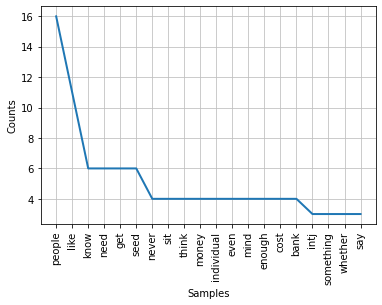

In [59]:
text.plot(20) # 상위 20개
plt.show()

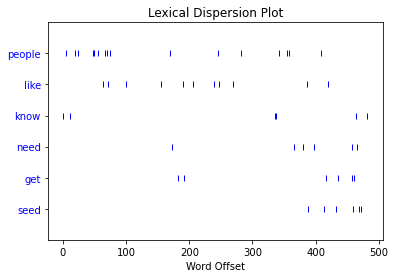

In [60]:
# 단어 사용 위치
text.dispersion_plot(["people", "like", "know", "need", "get", "seed"])

In [61]:
text.concordance("people")

Displaying 16 of 16 matches:
know intj tool use interaction people excuse antisocial truly enlighten m
unt pet peeze something time matter people either whether group people mall ne
 matter people either whether group people mall never see best friend sit outs
nt thought find fascinate sit watch people talk people fascinate sit class wat
ind fascinate sit watch people talk people fascinate sit class watch different
fascinate sit class watch different people find intrigue dad intj u stand look
 stand look like line safeway watch people home talk people like think militar
line safeway watch people home talk people like think military job people volu
talk people like think military job people voluntarily go job important show d
picture beast put someone arm sadly people blind brilliance need tell directly
ever reason college prepare recieve people like depend career introductory cou
e strange confession time mind wish people le judgemental self perceive flaw r
tistic even know asd associa

In [62]:
#------------- #

In [63]:
# 진행

In [64]:
data['tokenization']=data['posts'].apply(lambda x:word_tokenize(x))

In [65]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, intj, tool, use, interaction, people, e..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well..."
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J,3240,501,"[preferably, p, hd, low, except, wew, lad, vid..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g..."
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J,3267,501,"[space, program, ah, bad, deal, meing, freelan..."
...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,..."
106064,schedule modify hey w intp strong wing underst...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, w, intp, strong, wing,..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[enfj, since, january, busy, schedule, able, s..."


https://wikidocs.net/31698 
https://wikidocs.net/33661

DTM, TF-IDF 참고

In [66]:
# 전처리 안한 2차원배열 corpus 구성

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
# 예시

In [69]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [72]:
vector = CountVectorizer()

In [73]:
# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(data['tokenization'][0]).toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

{'know': 162, 'intj': 150, 'tool': 308, 'use': 317, 'interaction': 146, 'people': 213, 'excuse': 93, 'antisocial': 12, 'truly': 312, 'enlighten': 88, 'mastermind': 182, 'would': 333, 'count': 60, 'pet': 220, 'peeze': 212, 'something': 278, 'time': 307, 'matter': 183, 'either': 82, 'whether': 330, 'group': 128, 'mall': 181, 'never': 199, 'see': 263, 'best': 26, 'friend': 116, 'sit': 274, 'outside': 210, 'conversation': 56, 'jsut': 156, 'listen': 170, 'want': 323, 'interject': 148, 'formulate': 112, 'say': 261, 'wait': 321, 'inject': 142, 'argument': 13, 'thought': 305, 'find': 107, 'fascinate': 103, 'watch': 324, 'talk': 297, 'class': 43, 'different': 70, 'intrigue': 151, 'dad': 64, 'stand': 284, 'look': 176, 'like': 168, 'line': 169, 'safeway': 260, 'home': 135, 'think': 303, 'military': 190, 'job': 155, 'voluntarily': 320, 'go': 124, 'important': 139, 'show': 270, 'deference': 67, 'endanger': 87, 'live': 172, 'glorify': 123, 'way': 326, 'civilian': 42, 'pretty': 234, 'ignorant': 138, 

In [79]:
data['tokenization']

0         [know, intj, tool, use, interaction, people, e...
1         [rap, music, ehh, opp, yeah, know, valid, well...
2         [preferably, p, hd, low, except, wew, lad, vid...
3         [drink, like, wish, could, drink, red, wine, g...
4         [space, program, ah, bad, deal, meing, freelan...
                                ...                        
106062    [stay, frustrate, world, life, want, take, lon...
106063    [fizzle, around, time, mention, sure, mistake,...
106064    [schedule, modify, hey, w, intp, strong, wing,...
106065    [enfj, since, january, busy, schedule, able, s...
106066    [feel, like, men, good, problem, tell, parent,...
Name: tokenization, Length: 106067, dtype: object

### MBTI corpus 생성. (아직 불용어 정의하여 제거 안함)

In [78]:
corpus_MBTI = []

In [83]:
for i in range(len(data['tokenization'])):
    corpus_MBTI.append(data['tokenization'][i])

In [85]:
# corpus_MBTI 

In [88]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [92]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lasts\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
